# Dask Array

Материалы:
* Макрушин С.В. Лекция 11: Dask
* https://docs.dask.org/en/latest/array.html
* JESSE C. DANIEL. Data Science with Python and Dask. 

## Задачи для совместного разбора

In [1]:
import dask.array as da
import numpy as np

1. Создайте массив размерностью 1000 на 300000, заполненный числами из стандартного нормального распределения. Исследуйте основные характеристики полученного массива.

In [2]:
normal_dask_array = da.random.normal(size=(1000, 300000))
normal_dask_array

dask.array<normal, shape=(1000, 300000), dtype=float64, chunksize=(1000, 16777), chunktype=numpy.ndarray>

In [3]:
print(f'mean = {normal_dask_array.mean().compute()}')
print(f'std = {normal_dask_array.std().compute()}')
print(f'min = {normal_dask_array.min().compute()}')
print(f'max = {normal_dask_array.max().compute()}')
print(f'shape = {normal_dask_array.shape}')
print(f'dtype = {normal_dask_array.dtype}')
print("Олейников Александр")

mean = -8.976335315311671e-05
std = 1.0000038256850694
min = -5.848354168195807
max = 5.876412766332961
shape = (1000, 300000)
dtype = float64
Олейников Александр


2. Посчитайте сумму квадратов элементов массива, созданного в задаче 1. Создайте массив `np.array` такого же размера и сравните скорость решения задачи с использование `da.array` и `np.array`

In [4]:
%%time
print(da.sum(normal_dask_array**2).compute())

300002297.8326704
CPU times: total: 9.42 s
Wall time: 1.97 s


In [5]:
np_normal_array = np.random.normal(size=(1000, 300000))

In [6]:
%%time
print(np.sum(np_normal_array**2))

300054780.37115425
CPU times: total: 14 s
Wall time: 17.5 s


Олейников Александр

3. Визуализируйте граф вычислений для задачи 2.

In [7]:
da_sum = da.sum(normal_dask_array**2)

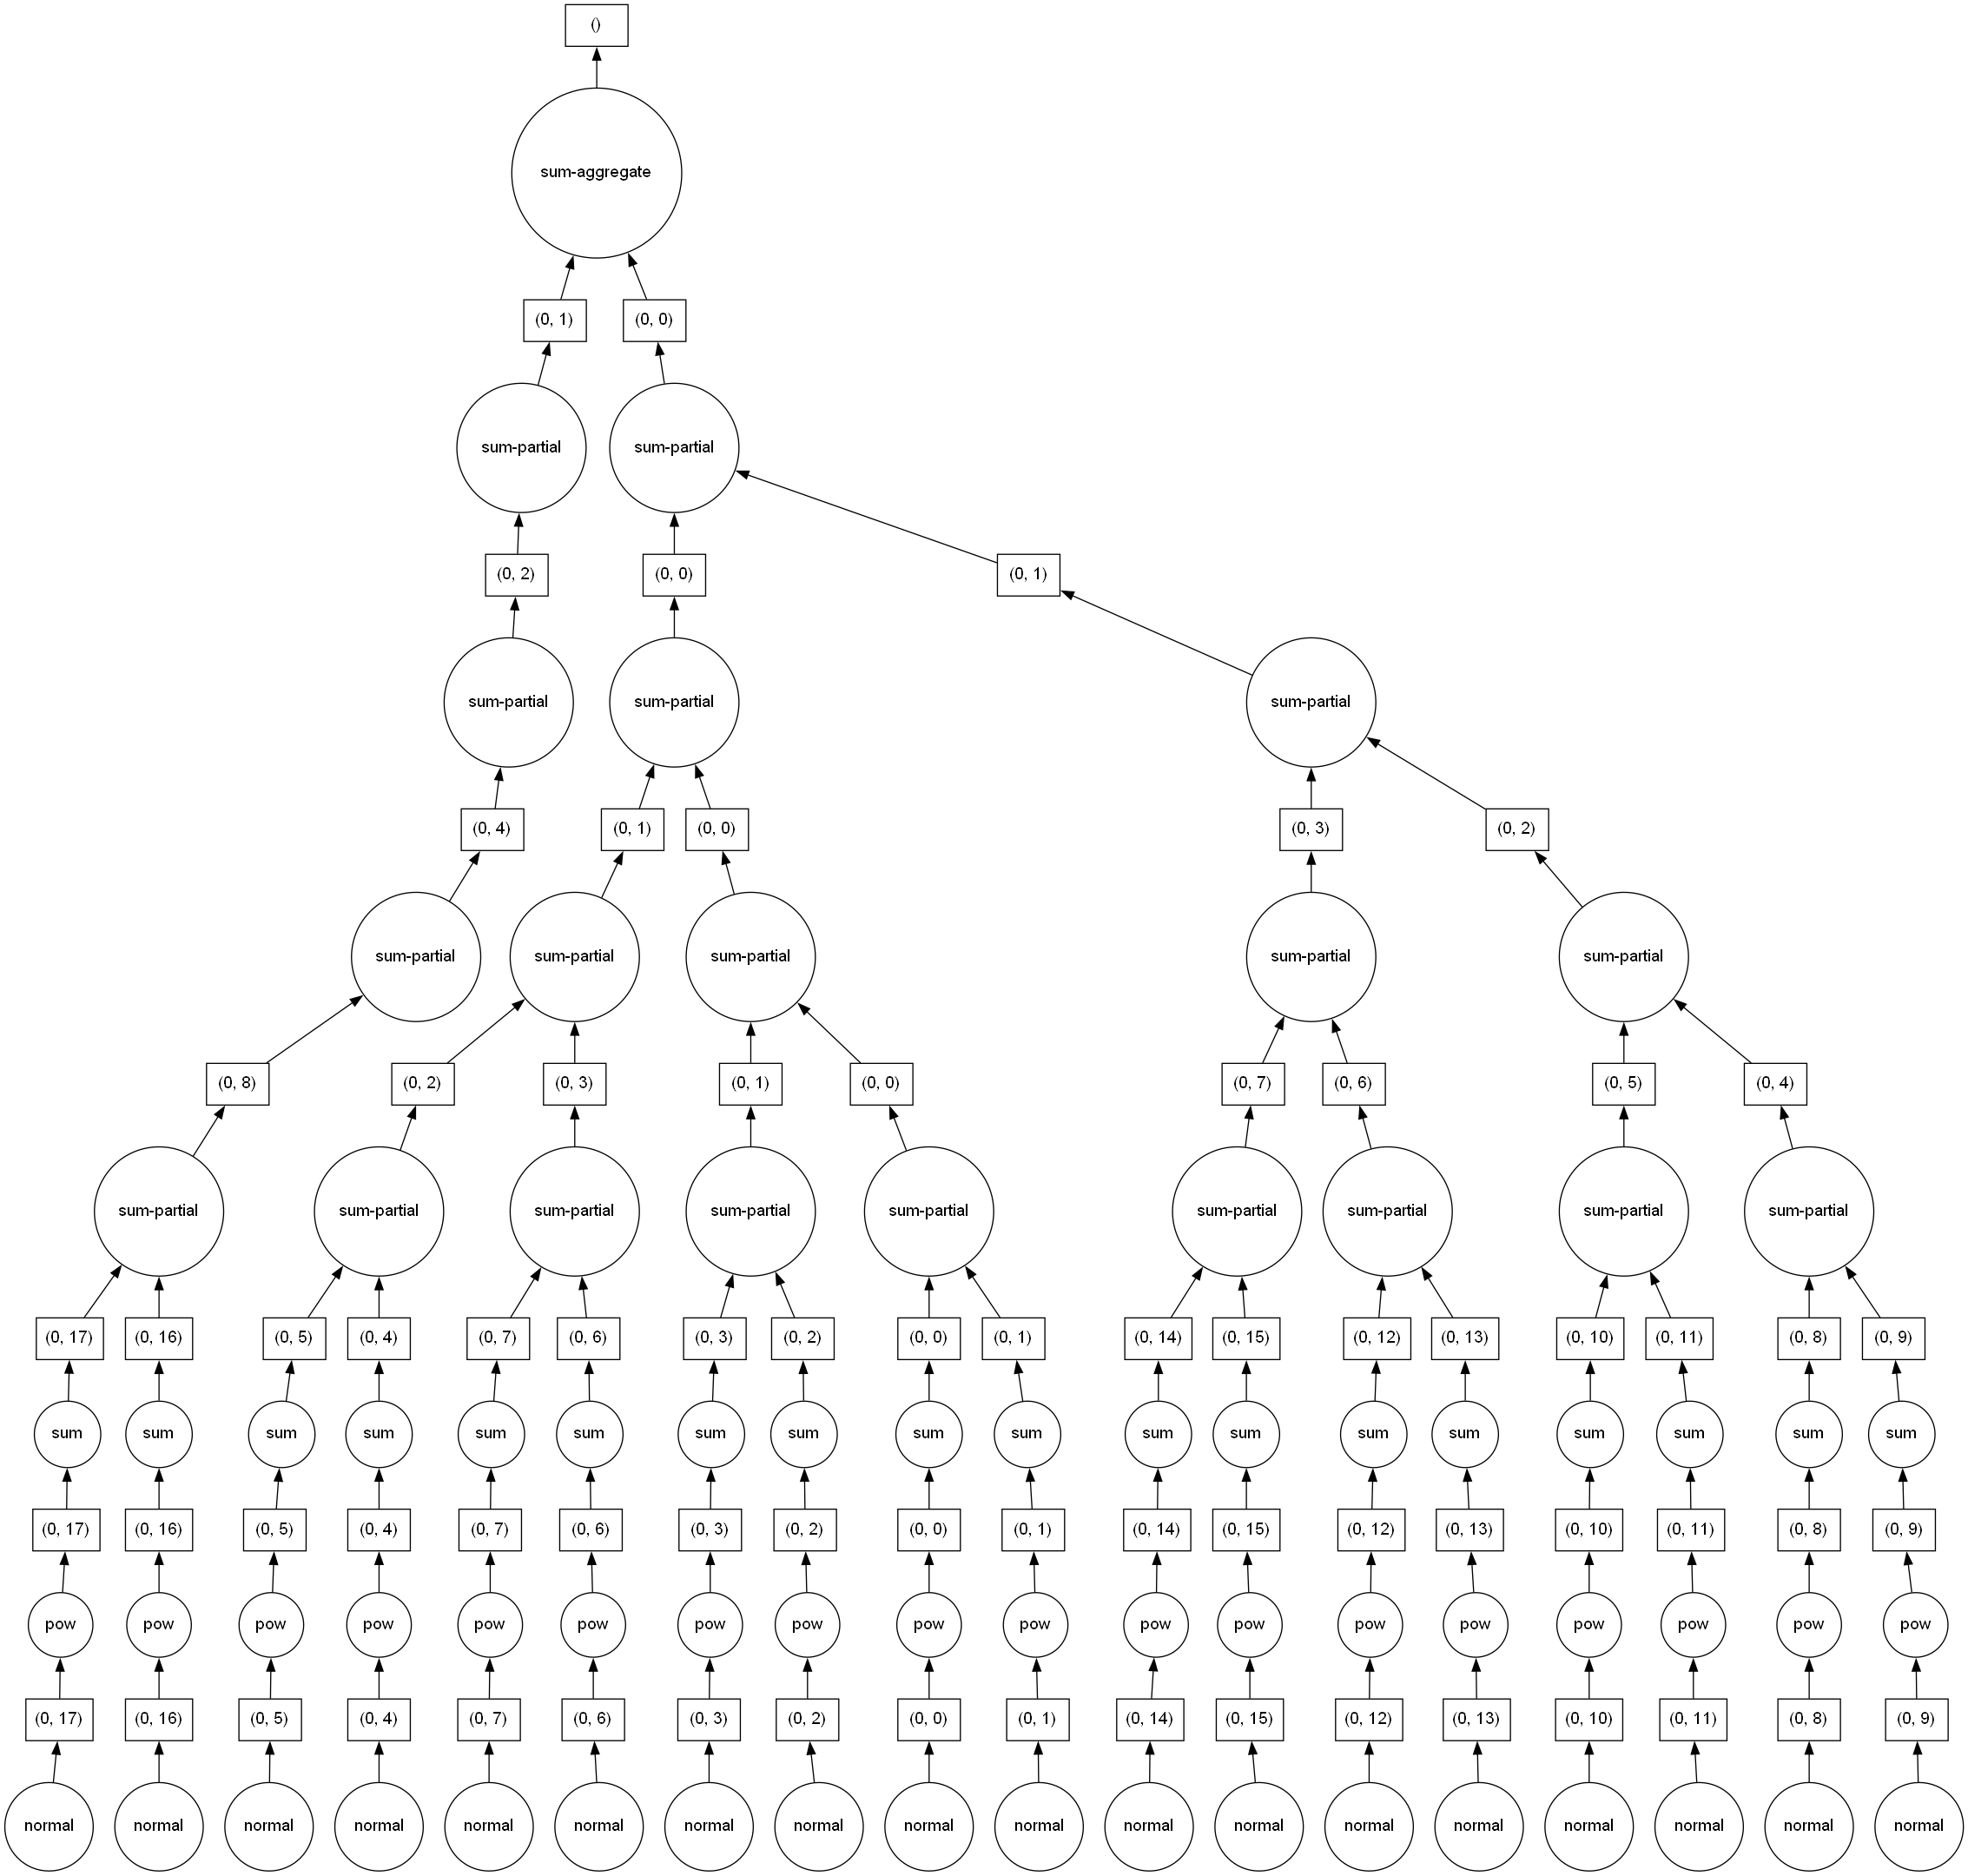

In [8]:
da_sum.visualize()

## Лабораторная работа 11

In [9]:
import dask.array as da
import h5py
import numpy as np

1. Считайте датасет `recipe` из файла `minutes_n_ingredients_full.hdf5` в виде `dask.array`. Укажите аргумент `chunks=(100_000, 3)` при создании массива. Выведите на экран основную информацию о массиве.

In [10]:
dataset = h5py.File('minutes_n_ingredients_full.hdf5')['/recipe']
dataset = da.from_array(dataset, chunks=(100_000, 3))
print(f'mean = {dataset.mean().compute()}')
print(f'std = {dataset.std().compute()}')
print(f'min = {dataset.min().compute()}')
print(f'max = {dataset.max().compute()}')
print(f'shape = {dataset.shape}')
print(f'dtype = {dataset.dtype}')
print("Олейников Александр")

mean = 375950.1723050538
std = 1050061.1347527588
min = 0
max = 2147483647
shape = (2231637, 3)
dtype = int64
Олейников Александр


2. Вычислите среднее значение по каждому столбцу, кроме первого.

In [11]:
print(dataset[:, 1:].mean(axis=0).compute())
print(f"Олейников Александр")

[1004.20805176    5.4198008 ]
Олейников Александр


3. Исследуйте, как влияет значение аргумента `chunks` при создании `dask.array` на скорость выполнения операции поиска среднего.

In [12]:
dataset = h5py.File('minutes_n_ingredients_full.hdf5')['/recipe']
dataset1 = da.from_array(dataset, chunks=(100_000, 3))
dataset2 = da.from_array(dataset)
dataset3 = da.from_array(dataset, chunks=500)
dataset4 = da.from_array(dataset, chunks=100000)
dataset5 = da.from_array(dataset, chunks=(573, 267))

In [13]:
%%time
print(dataset1[:, 1:].mean(axis=0).compute())

[1004.20805176    5.4198008 ]
CPU times: total: 93.8 ms
Wall time: 46.9 ms


In [14]:
dataset2

dask.array<array, shape=(2231637, 3), dtype=int64, chunksize=(2231637, 3), chunktype=numpy.ndarray>

In [15]:
%%time
print(dataset2[:, 1:].mean(axis=0).compute())

[1004.20805176    5.4198008 ]
CPU times: total: 78.1 ms
Wall time: 78.1 ms


In [16]:
%%time
print(dataset3[:, 1:].mean(axis=0).compute())

[1004.20805176    5.4198008 ]
CPU times: total: 2.31 s
Wall time: 2.3 s


In [17]:
%%time
print(dataset4[:, 1:].mean(axis=0).compute())

[1004.20805176    5.4198008 ]
CPU times: total: 93.8 ms
Wall time: 46.9 ms


In [18]:
%%time
print(dataset5[:, 1:].mean(axis=0).compute())

[1004.20805176    5.4198008 ]
CPU times: total: 1.95 s
Wall time: 1.78 s


Количество чанков - прямопропорционально времени выполнения
Олейников Александр

4. Выберите рецепты, время выполнения которых меньше медианного значения

In [19]:
mediana = da.median(dataset1[:, 1], axis=0).compute()
print(mediana)
print("Олейников Александр")
dataset1[dataset1[:, 1] < mediana].compute()

32.0
Олейников Александр


array([[1089012,      23,       5],
       [1428572,       0,       5],
       [1400250,      24,       1],
       ...,
       [1029131,      19,       4],
       [1700703,       1,       1],
       [ 713836,       0,       9]], dtype=int64)

5. Посчитайте количество каждого из возможных значений кол-ва ингредиентов

In [20]:
value, counts = da.unique(dataset1[:, 2], return_counts=True)
print("Олейников Александр")
dict(zip(value.compute(), counts.compute()))

Олейников Александр


{1: 222071,
 2: 224158,
 3: 229388,
 4: 234948,
 5: 240720,
 6: 244360,
 7: 247181,
 8: 246747,
 9: 246816,
 10: 22430,
 11: 19094,
 12: 15165,
 13: 11640,
 14: 8284,
 15: 6014,
 16: 4145,
 17: 2793,
 18: 1913,
 19: 1279,
 20: 852,
 21: 529,
 22: 346,
 23: 244,
 24: 178,
 25: 107,
 26: 68,
 27: 55,
 28: 33,
 29: 22,
 30: 20,
 31: 13,
 32: 5,
 33: 4,
 34: 3,
 35: 4,
 36: 1,
 37: 2,
 38: 1,
 39: 1,
 40: 2,
 43: 1}

6. Найдите максимальную продолжительность рецепта. Ограничьте максимальную продолжительность рецептов сверху значением, равному 75% квантилю.

In [21]:
da.max(dataset1[:, 1]).compute()

2147483647

In [22]:
arr = np.array(dataset1[:, 1].compute())
q_75 = np.quantile(arr, q=0.75)
print(q_75)
new_dataset = da.where(dataset1[:, 1] > q_75, q_75, dataset1[:, 1])
display(new_dataset.compute())
print(da.max(new_dataset).compute())
print("Олейников Александр")

49.0


array([33., 23.,  0., ..., 49.,  0., 49.])

49.0
Олейников Александр


7. Создайте массив `dask.array` из 2 чисел, содержащих ваши предпочтения относительно времени выполнения рецепта и кол-ва ингредиентов. Найдите наиболее похожий (в смысле $L_1$) рецепт из имеющихся в датасете.

In [23]:
my_data = da.array([62.5, 7])
L1 = da.array([abs(dataset1[:, 1] - my_data[0]), abs(dataset1[:, 2] - my_data[1])])
da_L1 = da.sum(da.transpose(L1).compute(), axis=1)
dataset1[da_L1 == da.min(da_L1)].compute()

array([[ 243724,      62,       7],
       [1301773,      62,       7],
       [1708166,      62,       7],
       ...,
       [ 631590,      62,       7],
       [1735794,      63,       7],
       [ 758202,      62,       7]], dtype=int64)

8. Работая с исходным файлом в формате `hdf5`, реализуйте алгоритм подсчета среднего значения в блочной форме и вычислите с его помощью среднее значение второго столбца в массиве.

Блочный алгоритм вычислений состоит из двух частей:
1. Загрузка фрагмента за фрагментом данных по `blocksize` элементов и проведение вычислений на этим фрагментом
2. Агрегация результатов вычислений на различных фрагментах для получения результата на уровне всего набора данных

Важно: при работе с `h5py` в память загружаются не все элементы, а только те, которые запрашиваются в данный момент

In [24]:
def mean_blocksize():
    blocksize = 100000

    with h5py.File('minutes_n_ingredients_full.hdf5', 'r') as f:
        data = f['recipe'][:, 1]
        total_sum = 0
        total_count = 0

        for i in range(0, dataset.shape[0], blocksize):
            block = data[i:i+blocksize]  # загружаем блок данных
            total_sum += block.sum()
            total_count += block.shape[0]

    average = total_sum / total_count
    print('Среднее значение:', average)

In [25]:
%%time
mean_blocksize()
print("Олейников Александр")

Среднее значение: 1004.2080517575215
Олейников Александр
CPU times: total: 31.2 ms
Wall time: 31.3 ms
